In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import numpy as np
import seaborn as sns

from scipy.stats import ttest_rel, ttest_ind

dir_gs = "/storage/groups/ml01/workspace/anna.schaar/tissue/grid_searches_gen/"
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

sns.set_palette("colorblind")

# GLM

## Linear model

In [2]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210520_LINEAR_BASELINE_MAX_NODES_PATIENT_1_ZHANG",
        "210520_LINEAR_MAX_NODES_PATIENT_1_ZHANG"
    ],
    lateral_resolution=1
)
gs_linear.load_gs()

210520_LINEAR_BASELINE_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
210520_LINEAR_MAX_NODES_PATIENT_1_ZHANG: loaded 9 runs with 3-fold cross validation


subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], gi

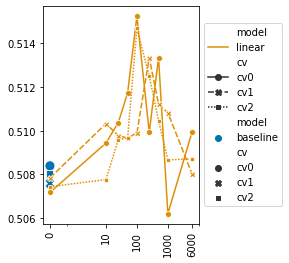

In [3]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='linear',
    baseline_model_class='linear_baseline',
    rename_levels = [
        ("model", {
            "LINEAR_MAX_NODES_PATIENT_1": "linear",
            "LINEAR_BASELINE_MAX_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0, 10, 100, 1000, 6000],
)

 ## Interaction model

In [4]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG",
        "210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
        "210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_linear.load_gs()

210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATI

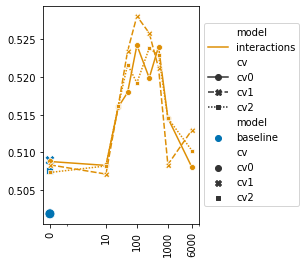

In [5]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0, 10, 100, 1000, 6000],
)

In [6]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=5.600937564995256, pvalue=0.030429565025988266)


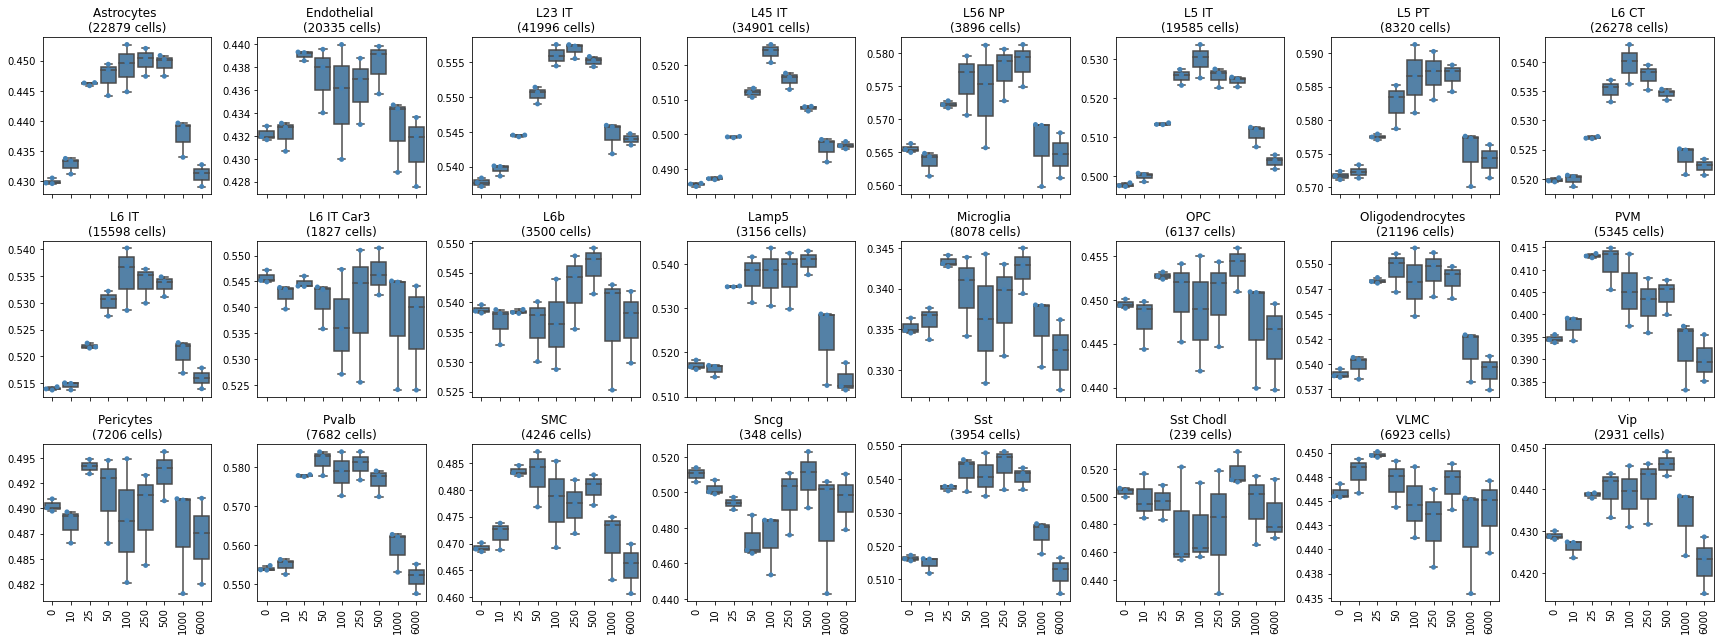

In [7]:
gs_linear.load_target_cell_evaluation()

gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'other']
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [8]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=dir_gs,
    gs_id="210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    cv_idx=0,
    model_id=test_id_interaction,
    expected_pickle=['history', 'hyperparam', 'evaluation', 'model_args']
)
clm._fn_model_weights
clm.get_data_again(
    data_path=dir_data + "zhang/",
    data_origin="zhang"
)
clm.split_data_byidx_again(cv_idx=0)

clm.init_model_again()
clm.load_weights_again()
clm.cond_type = 'max'

210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210511_interactions_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md4_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


collecting image-wise celldata


  5%|▍         | 3/64 [00:00<00:03, 15.73it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:04<00:00, 13.35it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Mean of mean node degree per images across images: 40.670611
cross-validation selected: cv0


In [9]:
lm = ncem.interpretation.InterpreterInteraction()
lm.load_model(
    results_path=dir_gs,
    gs_id="210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG",
    cv_idx=0,
    #model_id=test_id_interaction,
    expected_pickle=['history', 'hyperparam', 'evaluation', 'model_args']
)
lm._fn_model_weights
lm.get_data_again(
    data_path=dir_data + "zhang/",
    data_origin="zhang"
)
lm.split_data_byidx_again(cv_idx=0)

lm.init_model_again()
lm.load_weights_again()
lm.cond_type = 'max'

210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210511_interactions_baseline_none_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


collecting image-wise celldata


  5%|▍         | 3/64 [00:00<00:02, 28.22it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:02<00:00, 25.66it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Mean of mean node degree per images across images: 0.000145
cross-validation selected: cv0


In [10]:
clm.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 625, 1, 0, 2)})
lm.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 625, 1, 0, 2)})

setting reinitialized layer weights to layer weights from model 210511_interactions_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md4_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
setting reinitialized layer weights to layer weights from model 210511_interactions_baseline_none_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


In [11]:
adata_img, adata_L23IT = clm.target_cell_relative_performance(
    image_key='mouse1_slice153',
    baseline_model=lm,
    target_cell_type='L2/3 IT',
    undefined_type='other',
    n_neighbors=40,
    n_pcs=40,
    clean_view=True
)

  0%|          | 0/7439 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


100%|██████████| 7439/7439 [05:56<00:00, 20.89it/s]
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
         Falling back to preprocessing with `sc.pp.pca` and default params.


n cells:  1204
L2/3 IT 0    316
L2/3 IT 1    314
L2/3 IT 2    313
L2/3 IT 3    133
L2/3 IT 4    128
Name: L2/3 IT substates, dtype: int64


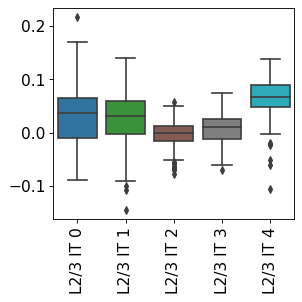

In [12]:
clm.plot_substate_performance(
    adata=adata_L23IT, target_cell_type='L2/3 IT'
)

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


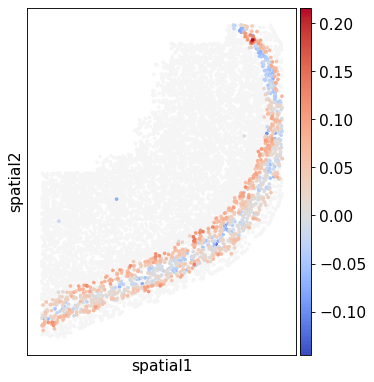

In [13]:
clm.plot_spatial_relative_performance(
    adata=adata_img, target_cell_type='L2/3 IT', figsize=(5,5), clean_view=True
)

In [14]:
adata_img, adata_L23IT = clm.target_cell_relative_performance(
    image_key='mouse1_slice162',
    baseline_model=lm,
    target_cell_type='L2/3 IT',
    undefined_type='other',
    n_neighbors=40,
    n_pcs=40,
    clean_view=True
)

100%|██████████| 6759/6759 [05:05<00:00, 22.14it/s]
Trying to set attribute `.obs` of view, copying.
         Falling back to preprocessing with `sc.pp.pca` and default params.


n cells:  946
L2/3 IT 0    226
L2/3 IT 1    209
L2/3 IT 2    193
L2/3 IT 3    191
L2/3 IT 4    127
Name: L2/3 IT substates, dtype: int64


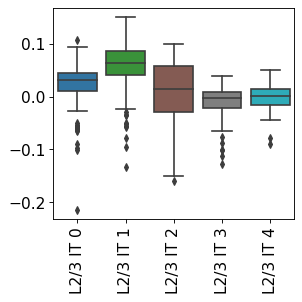

In [15]:
clm.plot_substate_performance(
    adata=adata_L23IT, target_cell_type='L2/3 IT'
)

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


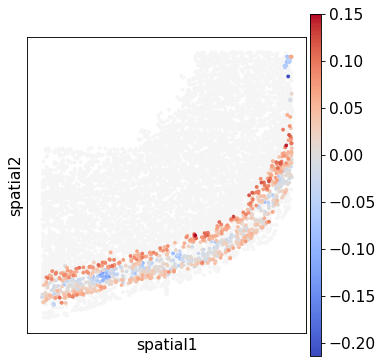

In [16]:
clm.plot_spatial_relative_performance(
    adata=adata_img, target_cell_type='L2/3 IT', figsize=(5,5)
)

# Encoder-decoder NCEM models

In [17]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
        "210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_linear.load_gs()

test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)

210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation


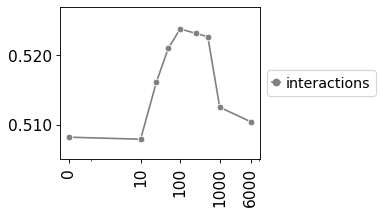

In [18]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'mean_lineplot',
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    xticks=[ 0,  10,   100,  1000, 6000],
)

In [19]:
gs_ed_ncem_max = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem_max.load_gs()

test_id_ed = gs_ed_ncem_max.get_best_model_id(
    subset_hyperparameters=[("model", "LVMNP_NONE_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_test_r2 = np.array(
    gs_ed_ncem_max.summary_table[gs_ed_ncem_max.summary_table["run_id"] ==test_id_ed]['test_r_squared_linreg']
)

test_id_ed_ncem_max = gs_ed_ncem_max.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_max_test_r2 = np.array(
    gs_ed_ncem_max.summary_table[gs_ed_ncem_max.summary_table["run_id"] ==test_id_ed_ncem_max]['test_r_squared_linreg']
)

210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation


subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']


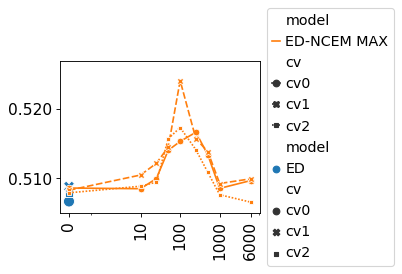

In [20]:
gs_ed_ncem_max.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "CLVMNP_MAX_NODES_PATIENT_1": "ED-NCEM MAX",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    plot_mode = 'lineplot',
    xticks=[ 0,  10,   100,  1000, 6000],
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
)

In [21]:
gs_ed_ncem_gcn = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem_gcn.load_gs()

test_id_ed_ncem_gcn = gs_ed_ncem_gcn.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_GCN_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_gcn_test_r2 = np.array(
    gs_ed_ncem_gcn.summary_table[gs_ed_ncem_gcn.summary_table["run_id"] ==test_id_ed_ncem_gcn]['test_r_squared_linreg']
)

210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG: loaded 62 runs with 3-fold cross validation


subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']


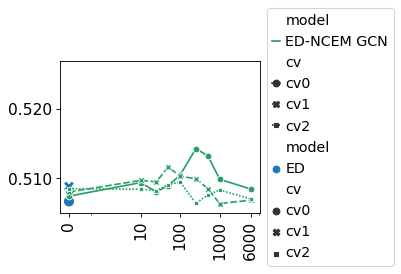

In [22]:
gs_ed_ncem_gcn.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "CLVMNP_GCN_NODES_PATIENT_1": "ED-NCEM GCN",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    plot_mode = 'lineplot',
    xticks=[ 0,  10,   100,  1000, 6000],
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
)

In [23]:
print(ttest_rel(ed_ncem_max_test_r2, ed_test_r2))
print(ttest_rel(ed_ncem_gcn_test_r2, ed_test_r2), '\n')
print(ttest_ind(ed_ncem_max_test_r2, interaction_test_r2))
print(ttest_ind(ed_ncem_gcn_test_r2, interaction_test_r2))

Ttest_relResult(statistic=5.355240979482038, pvalue=0.03314531105437973)
Ttest_relResult(statistic=0.9012329859274131, pvalue=0.46258180799729487) 

Ttest_indResult(statistic=-1.3252924337746408, pvalue=0.2557043728365311)
Ttest_indResult(statistic=-3.974839087655377, pvalue=0.016471947026990903)


210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation
210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG: loaded 62 runs with 3-fold cross validation


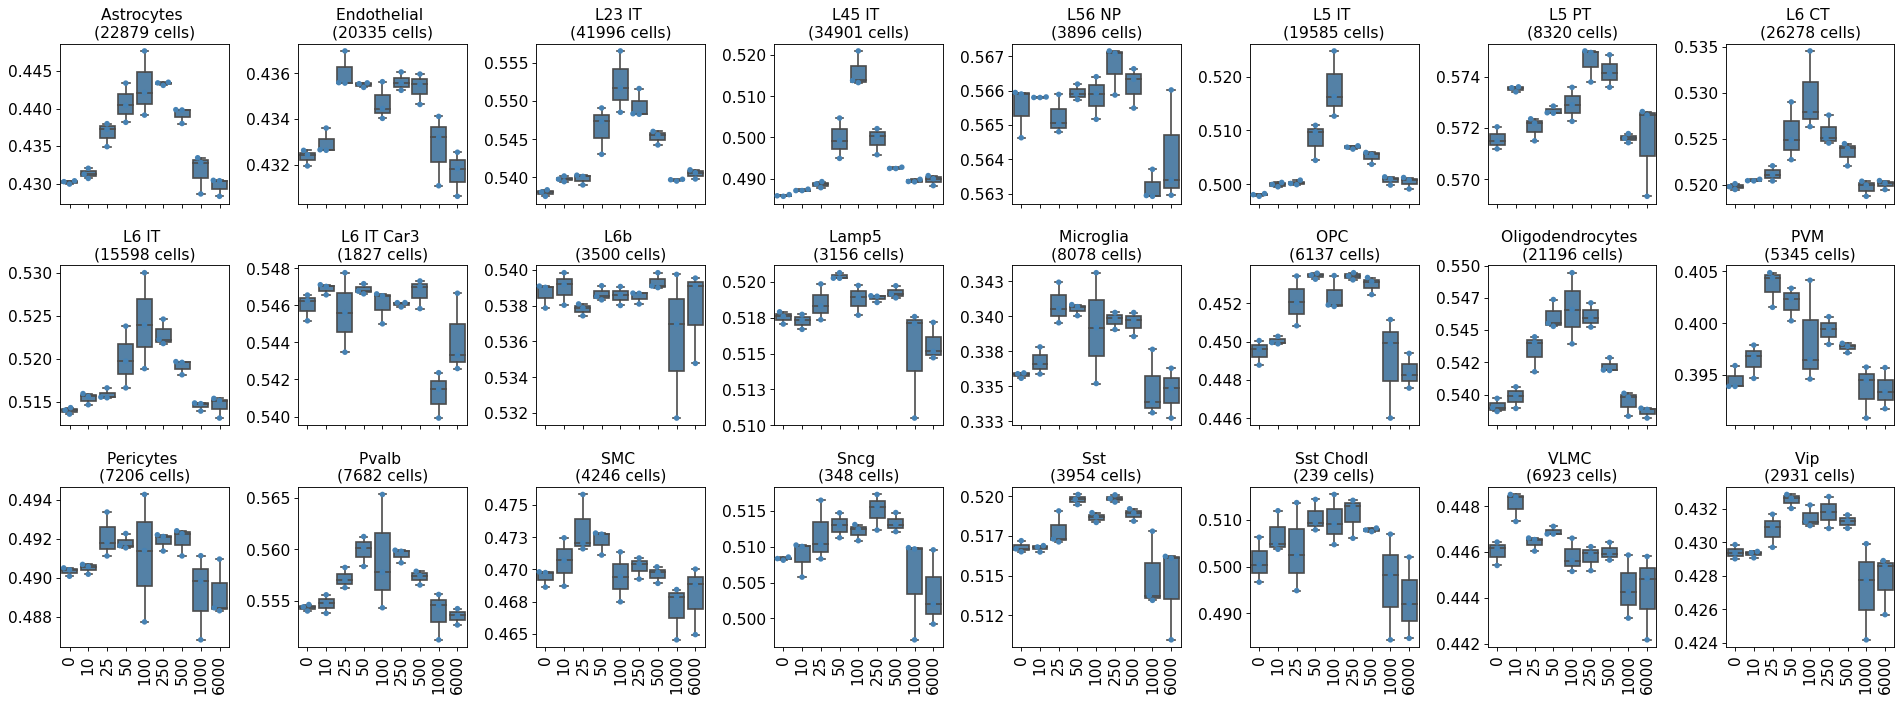

In [24]:
gs_ed_ncem = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
        "210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem.load_gs()

gs_ed_ncem.load_target_cell_evaluation()
gs_ed_ncem.target_cell_table = gs_ed_ncem.target_cell_table[gs_ed_ncem.target_cell_table['target_cell'] != 'other']

gs_ed_ncem.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [25]:
ed_ncem_max = ncem.interpretation.InterpreterEDncem()

ed_ncem_max.load_model(
    results_path=dir_gs,
    gs_id="210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
    cv_idx=1,
    #model_id='210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22',
    lateral_resolution=1
)
ed_ncem_max._fn_model_weights
ed_ncem_max.get_data_again(
    data_path=dir_data + 'zhang/',
    data_origin="zhang"
)
ed_ncem_max.split_data_byidx_again(cv_idx=1)

ed_ncem_max.init_model_again()
ed_ncem_max.load_weights_again()
ed_ncem_max._model_kwargs['input_shapes']

210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation
cross-validation selected: cv1
loaded model 210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


collecting image-wise celldata


  5%|▍         | 3/64 [00:00<00:02, 23.00it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:03<00:00, 19.34it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Node_type added to categorical predictor matrix
Mean of mean node degree per images across images: 40.670611
cross-validation selected: cv1


(25, 254, 7656, 10, 25, 2)

In [26]:
ed_ncem_max.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 7656, 1, 25, 2)})

setting reinitialized layer weights to layer weights from model 210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22


In [27]:
saliencies = ed_ncem_max.target_cell_saliencies(
    target_cell_type='L2/3 IT',
    drop_columns=['other'],
    multicolumns=['mouse','slice'],
)

  0%|          | 0/64 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


/mnt/home/icb/anna.schaar/git/ncem/ncem/interpretation/interpreter.py:705: RuntimeWarning: invalid value encountered in true_divide
  img_saliency.append(saliencies/neighbourhood)
100%|██████████| 64/64 [05:35<00:00,  5.24s/it]


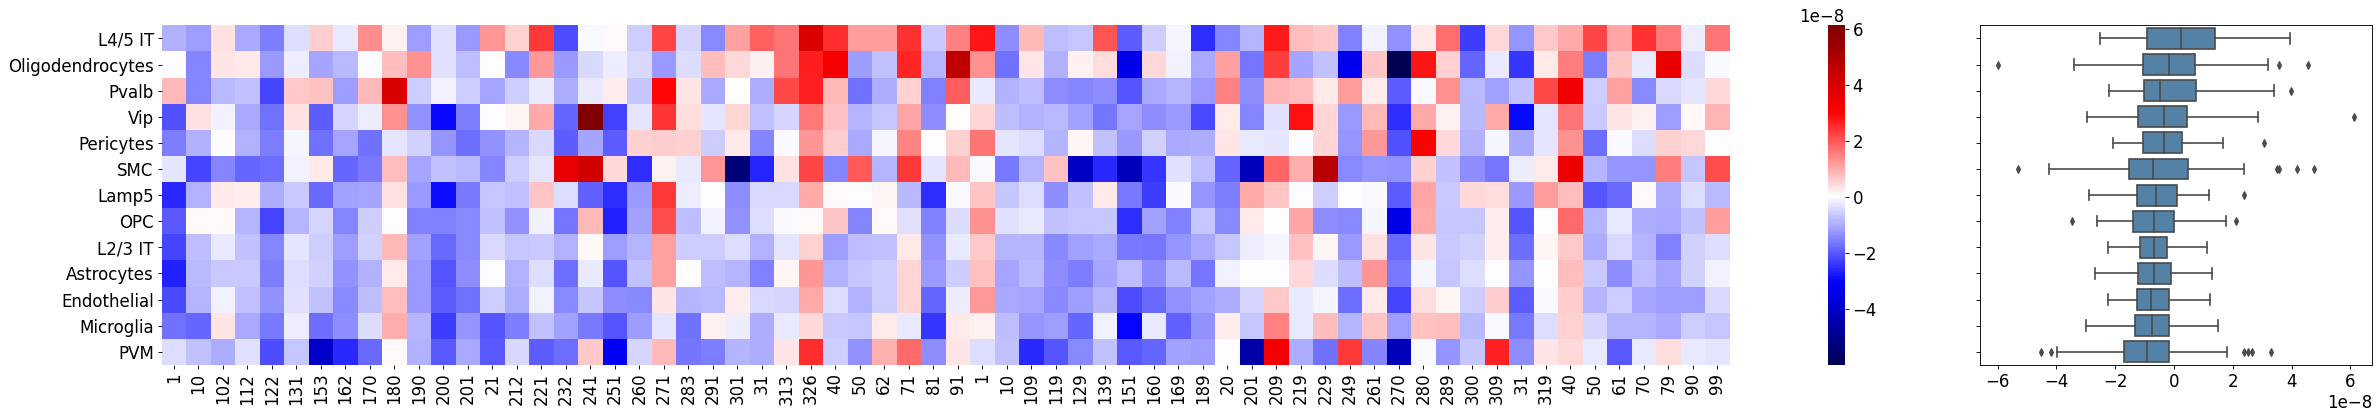

In [28]:
saliencies = saliencies.assign(
    m=saliencies.mean(axis=1, skipna=False)
).sort_values('m', ascending=False).drop('m', axis=1)
ed_ncem_max.plot_target_cell_saliencies(
    saliencies=saliencies[:13],
    fontsize=15,
    figsize=(30,5.5)
)

# Conditional variational autoencoder NCEM